In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('kc_house_data.csv')

In [5]:
print(data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [16]:
data.drop(columns=['id'], inplace=True)
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month
df.drop(columns=['date'], inplace=True)  # Drop original date column


In [17]:
data['date'] = pd.to_datetime(data['date'])
data['year_sold'] = data['date'].dt.year
data['month_sold'] = data['date'].dt.month
data.drop(columns=['date'], inplace=True)  # Drop original date column


In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numericals_column=data.select_dtypes(include=['int64','float64']).columns
data[numericals_column]=scaler.fit_transform(data[numericals_column])

In [25]:
from sklearn.model_selection import train_test_split
x=data.drop(columns=['price'])
y=data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.8)

In [26]:
from sklearn.preprocessing import PolynomialFeatures
degree=2
poly=PolynomialFeatures(degree=degree)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)



In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [30]:
model.fit(x_train_poly,y_train)

LinearRegression()

In [31]:
y_predict=model.predict(x_test_poly)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)


In [36]:
mse
r2

0.7569811818359538

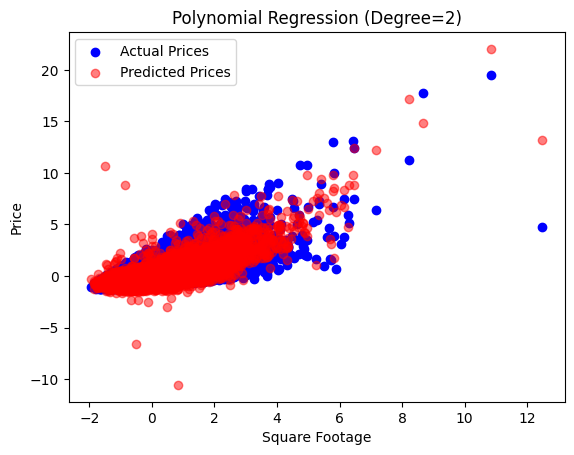

In [38]:
plt.scatter(x_test['sqft_living'], y_test, color='blue', label="Actual Prices")
plt.scatter(x_test['sqft_living'], y_predict, color='red', label="Predicted Prices", alpha=0.5)
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.legend()
plt.title(f"Polynomial Regression (Degree={degree})")
plt.show()
